# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0383 Зенин Пётр и Мария Ханина. Вариант №20.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Аналоговый сигнал** — сигнал, непрерывный по времени.

**Дискретный сигнал** – сингал, дискретный по времени и непрерывный по значению

**Спектр дискретного сигнала** - $S(\omega) = \sum\limits_{k=-\infty}^{\infty}x_ke^{i\omega k}$

**Дискретное преобразование Фурье** - $X(n) = \sum\limits_{k=0}^{N-1}x_k e^{-i\frac{2\pi n}{N}k}, \quad n=0,1,2,\dots,N-1$

**Численное дифференцирование 1-го порядка**:

$s'(n) = \frac{s_{n+1} - s_{n-1}}{2h}$

$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = i\sin(\omega)$


**Численное интегрирование методом прямоугольников**:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$ 

$H(\omega) = \frac{1}{2i \sin(\frac{\omega}{2})}$


**Численное интегрирование методом трапеций**:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0$

$H(\omega) = \frac{cos(\frac{\omega}{2})}{2i \sin(\frac{\omega}{2})}$



**Численное интегрирование методом Симпсона**:

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

$H(\omega) = \frac{2 + \cos(\omega)}{3i \sin(\omega)}$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_kt + \phi_k)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi

In [3]:
def generate_signals():
    d_t = np.linspace(0,31,32)
    t = np.linspace(0,31,16384)
    omega = np.arange(0,1.1,0.1)*pi
    phi = np.random.random(size=11)/2
    A_k = np.random.randint(1,12,size=11) #Генерируются целые числа в диапазоне [1;12)
    A_k = A_k/np.sum(A_k)
    
    signal = []
    disc_signal = []
    
    for x in t:
        value = np.sum(A_k * np.cos(omega*x + phi))
        signal.append(value)
    
    for x in d_t:
        value = np.sum(A_k * np.cos(omega*x + phi))
        disc_signal.append(value)
    
    return (np.array(signal), np.array(disc_signal))

signal, disc_signal = generate_signals()

#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

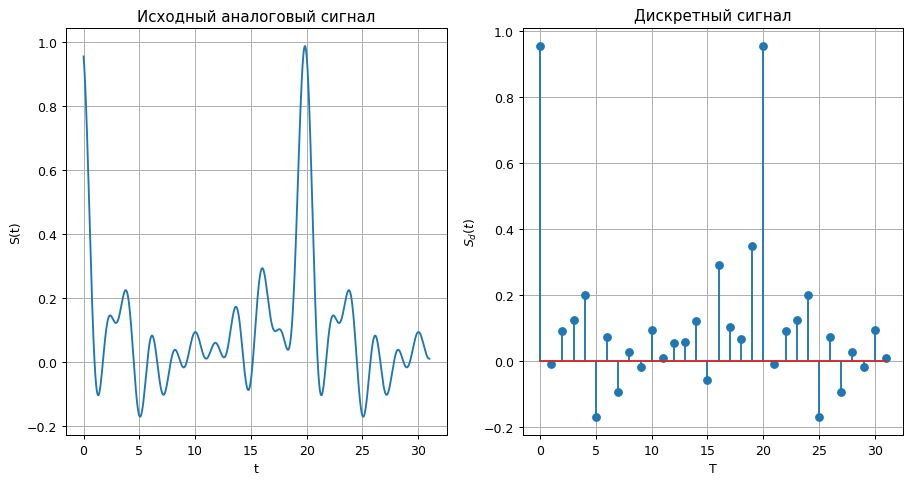

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6), dpi = 90)


ax1.plot(np.linspace(0,31,16384),signal)
ax1.set_title("Исходный аналоговый сигнал")
ax1.set_xlabel("t")
ax1.set_ylabel("S(t)")
ax1.grid()


ax2.stem(np.arange(0,32,1),disc_signal)
ax2.set_title("Дискретный сигнал")
ax2.set_xlabel("T")
ax2.set_ylabel(r"$S_d(t)$")
ax2.grid()
#fig.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

$X(n) = \sum\limits_{k=0}^{N-1} x_ke^{-i\frac{2\pi n}{N}k}, \quad n={0,1,2,\dots,N-1}$

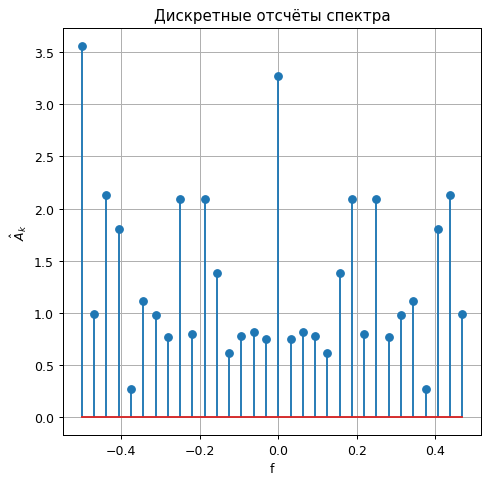

In [5]:
def DFT(x):
    N = 32
    spectre = []
    for n in range(0,N):
        spectre.append(np.sum(x*np.exp(np.arange(0,N,1)*2j * pi * n/N)))
    return np.array(np.abs(spectre))

plt.figure(figsize = (6,6), dpi = 90)
plt.stem(np.arange(-0.5,0.5,1/32), DFT(disc_signal))
plt.title("Дискретные отсчёты спектра")
plt.xlabel("f")
plt.ylabel(r"$\hat{A}_k$")
plt.grid()
plt.show()

Полученный спектр симметричен относительно нуля.

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для  $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

**Сглаживание по пяти точкам:**

$y_{n=5} = \frac{1}{5}\sum\limits_{k=-2}^2 x_{n+k}$, 

$H(\omega) = \frac{1}{5}(1 + 2\cos(\omega) + 2\cos(2\omega))$

<br><br>

**Сглаживание по девяти точкам:**

$y_{n=9} = \frac{1}{9}\sum\limits_{k=-4}^4 x_{n+k}$, 

$H(\omega) = \frac{1}{9}(1 + 2\cos(\omega) + 2\cos(2\omega) + 2cos(3\omega) + 2cos(4\omega))$

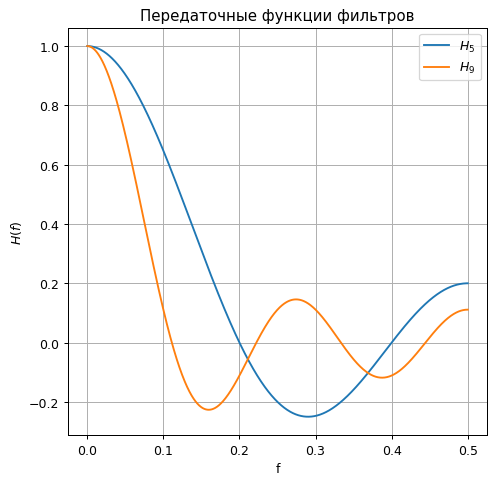

In [6]:
x = np.linspace(0,0.5,1000)*2
h5 = (1/5) * (1 + 2*np.cos(x*pi) + 2 * np.cos(2*x*pi))
h9 = (1/9) * (1 + 2*np.cos(x*pi) + 2 * np.cos(2*x*pi) + 2 * np.cos(3*x*pi) + 2 * np.cos(4*x*pi))

x = np.linspace(0,0.5,1000)
plt.figure(figsize = (6,6), dpi = 90)
plt.plot(x,h5, label = r"$H_5$")
plt.plot(x,h9, label = r"$H_9$")
plt.title("Передаточные функции фильтров")
plt.xlabel("f")
plt.ylabel(r"$H(f)$")
plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

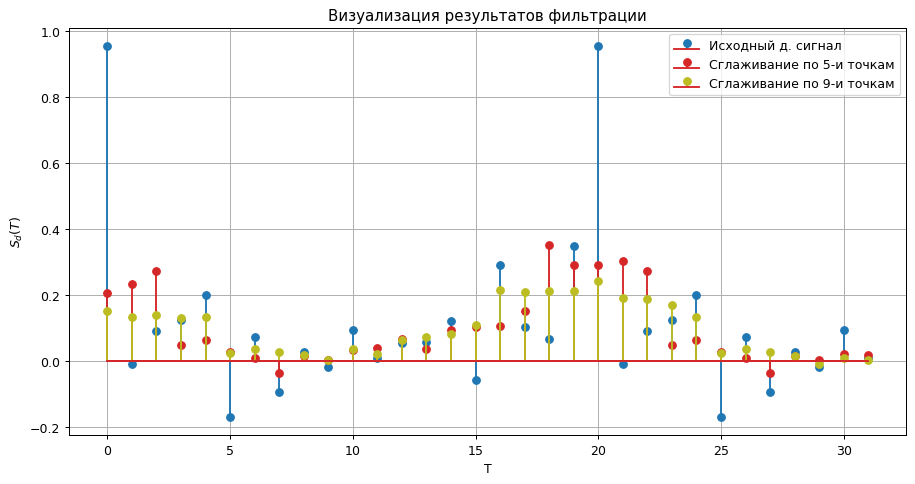

In [7]:
def filter_5(signal):
    return np.convolve(signal, np.ones(5)/5, mode = "same")

def filter_9(signal):
    return np.convolve(signal, np.ones(9)/9, mode = "same")

T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный д. сигнал")
plt.stem(T, filter_5(disc_signal), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.stem(T, filter_9(disc_signal), label = "Сглаживание по 9-и точкам", linefmt="C8-", markerfmt="C8o")
plt.title("Визуализация результатов фильтрации")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

На графике можно заметить, что чем выше количество точек, по которым происходит сглаживание, тем меньше всплесков остаётся в сигнале (уменьшается влияние высокочастотных гармоник).

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

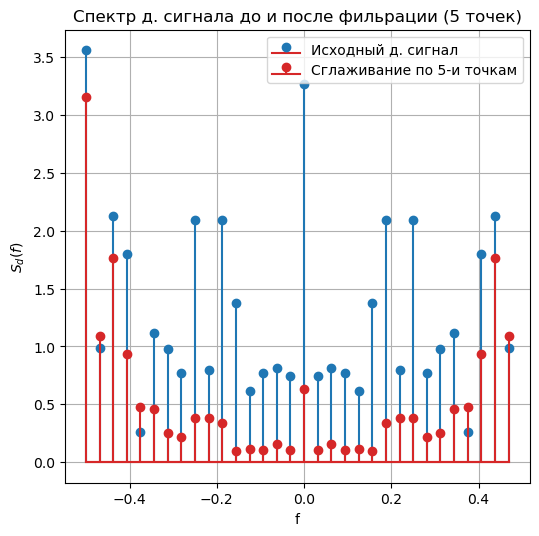

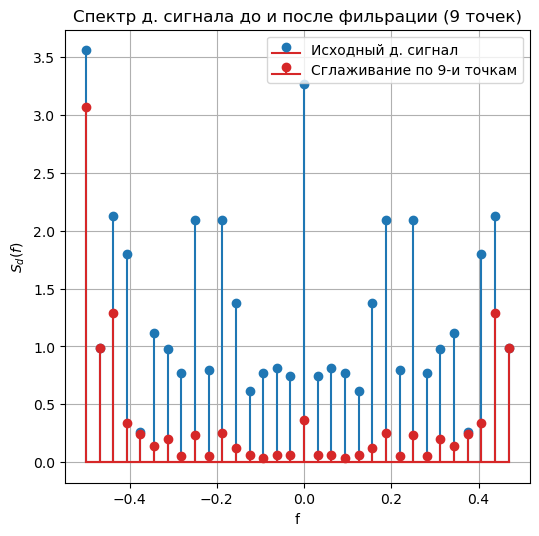

In [8]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(filter_5(disc_signal)), label = "Сглаживание по 5-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (5 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(filter_9(disc_signal)), label = "Сглаживание по 9-и точкам", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (9 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Передаточные функции фильтров имееют значения $<1$ при $f > 0$. Это заметно на графиках спектров: амплитуды частот никогда не превосходят амплитуд частот исходного дискретного сигнала. Передаточная функция линейного фильтра сглаживания по 5-и точкам имеет меньшую куртизну спада, чем у фильтра сглаживания по 9-и точкам. Этот эффект виден и на найденных спектрах. В значениях $f \in [0.1, 0.2] \cup [0.4, 0.5]$ видно, что амлитуда частот в этом интервале уменьшается с увеличением количества точек, по которым происходит сгалживание. 

#### 8. Повторить п. 4–7 для следующих фильтров: 
a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

#### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Численное дифференцирование 1-го порядка: 

$s'(n) = \frac{s_{n+1} - s_{n-1}}{2h}$

$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = i\sin(\omega)$




In [32]:
h_diff = np.imag(np.sin(1j * x))
s_diff = np.concatenate(([disc_signal[1]/2],
                         disc_signal[2:] - disc_signal[:len(disc_signal)-2],
                         [(disc_signal[0]-disc_signal[30])/2])) / 2

#середина значений s_diff может быть найдена при помощи вычитания смещённых значений дискретного сигнала
#из изначального массива значений дискретного сигнала.
#Для нахождения s(0) и s(31) необходимо учесть, что:
#1. d(T<0) = 0
#2. d(32) = d(0)
#Следовательно: s(0) = d(1)/2;  s(31) = (s(0)-s(30))/2

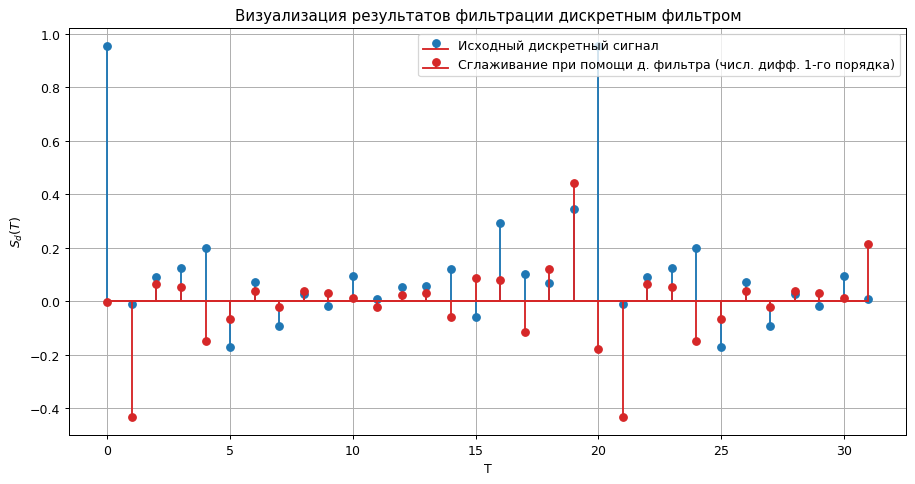

In [33]:
T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный дискретный сигнал")
plt.stem(T, s_diff, label = "Сглаживание при помощи д. фильтра (числ. дифф. 1-го порядка)", linefmt="C3", markerfmt="C3o")
plt.title("Визуализация результатов фильтрации дискретным фильтром")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

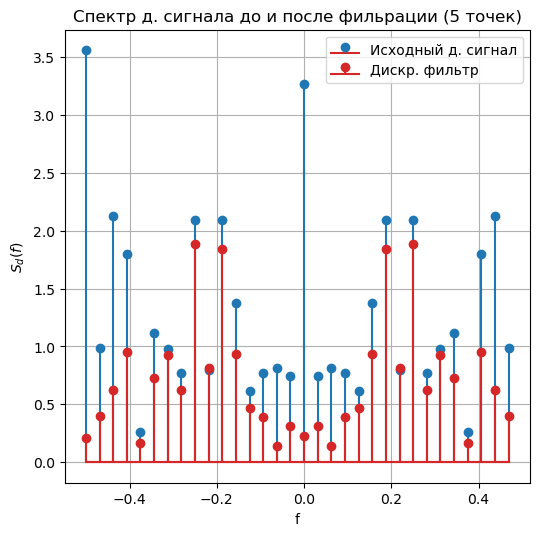

In [34]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(s_diff), label = "Дискр. фильтр", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после фильрации (5 точек)")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

Дискретный фильтр, соответсвтущий численному дифференцированию 1-го порядка по большей части уменьшает воздействие низкочастотных и высокочастотных гармоник. В свою очередь амплитуды средних частот снижаются менее сильно; остаются почти на том же уровне.

___________

#### Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Численное интегрирование методом прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$ 

$H(\omega) = \frac{1}{2i \sin(\frac{\omega}{2})}$

<br><br>
Численное интегрирование методом трапеций:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0$

$H(\omega) = \frac{cos(\frac{\omega}{2})}{2i \sin(\frac{\omega}{2})}$


<br><br>
Численное интегрирование методом Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

$H(\omega) = \frac{2 + \cos(\omega)}{3i \sin(\omega)}$

In [38]:
def rect_int(signal):
    result = [0]
    for i in range(len(signal)-1):
        result.append(result[-1] + signal[i])
    
    return result


def tr_int(signal):
    result = [0]
    for i in range(len(signal)-1):
        result.append(result[-1] + (signal[i] + signal[i+1])/2)
    
    return result

def simpson_int(signal):
    result = [0, 0]
    for i in range(1,len(signal)-1):
        result.append(result[-2] + (signal[i-2] + 4*signal[i-1] + signal[i])/3)
    
    return result

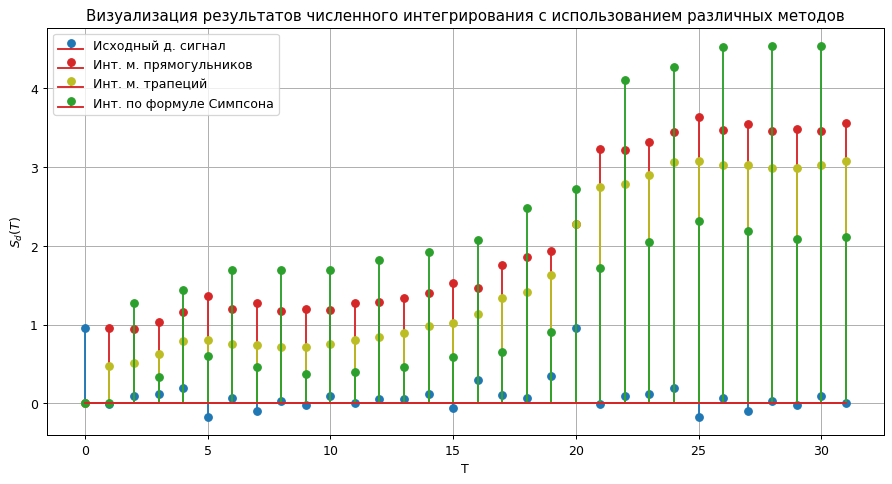

In [57]:
T = np.arange(0,32,1)

plt.figure(figsize=(12,6), dpi = 90)

plt.stem(T, disc_signal, label = "Исходный д. сигнал")
plt.stem(T, rect_int(disc_signal), label = "Инт. м. прямогульников", linefmt="C3", markerfmt="C3o")
plt.stem(T, tr_int(disc_signal), label = "Инт. м. трапеций", linefmt="C8-", markerfmt="C8o")
plt.stem(T, simpson_int(disc_signal), label = "Инт. по формуле Симпсона", linefmt="C2-", markerfmt="C2o")
plt.title("Визуализация результатов численного интегрирования с использованием различных методов")
plt.xlabel("T")
plt.ylabel(r"$S_d(T)$")
plt.legend()
plt.grid()
plt.show()

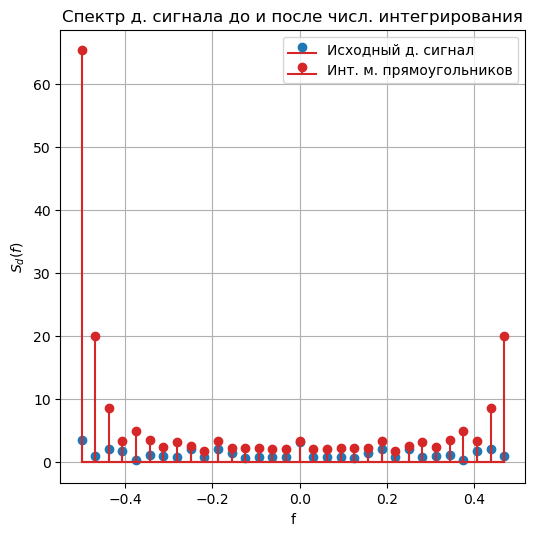

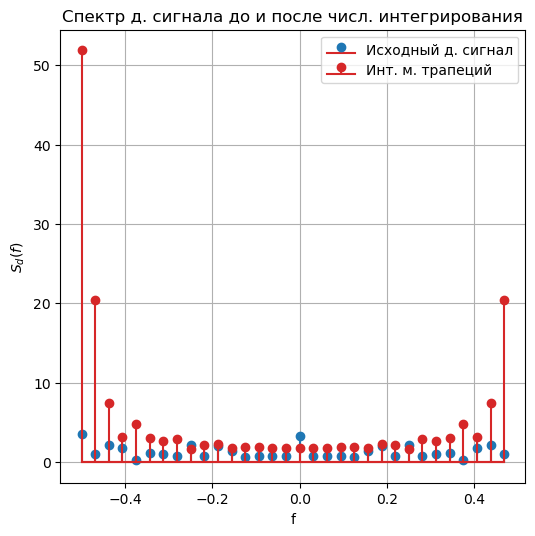

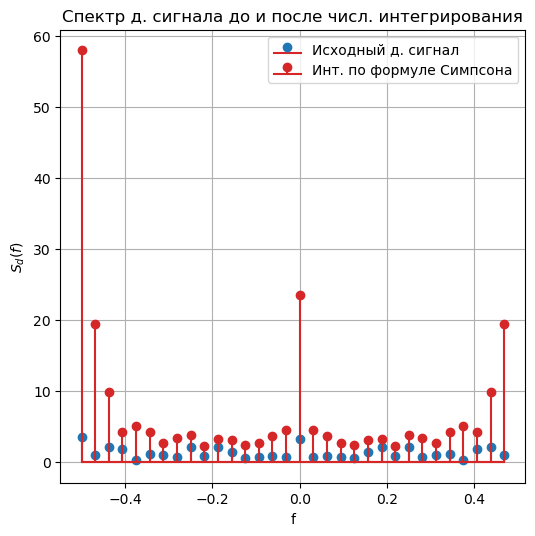

In [61]:
f = np.arange(-0.5,0.5,1/32)


plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(rect_int(disc_signal)), label = "Инт. м. прямоугольников", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после числ. интегрирования")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(tr_int(disc_signal)), label = "Инт. м. трапеций", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после числ. интегрирования")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (6,6), dpi = 100)

plt.stem(f, DFT(disc_signal), label = "Исходный д. сигнал")
plt.stem(f, DFT(simpson_int(disc_signal)), label = "Инт. по формуле Симпсона", linefmt="C3", markerfmt="C3o")
plt.title("Спектр д. сигнала до и после числ. интегрирования")
plt.xlabel("f")
plt.ylabel(r"$S_d(f)$")
plt.legend()
plt.grid()
plt.show()

Все методы численного интегрирования увеличили амплитуды частот, причём метод Симпсона увеличил низкие частоты сильнее остальных методов. 
Услиение высоких частот более выраженное, чем усиление остальных частот.

## Выводы

В данной работе был сгенерирован дискретный сигнал на основе аналогового, над которым в дальнейшем были произведены операции дискретного преобразования фурье и сглаживания различной конфигурации. Были реализованы функции, выполняющие численное интегрирование методом прямоугольников, трапеций, по формуле Симпсона. Были наглядно показаны эффекты применения различных методов численного интегрирования на спектр сигнала. Было проанализировано воздействие различных методов численного интегрирования на спектр выходного сигнала.